# Анализ рынка видеоигр

## Описание данных

Name — название игры</br>

Platform — платформа</br>

Year_of_Release — год выпуска</br>

Genre — жанр игры</br>

NA_sales — продажи в Северной Америке (миллионы проданных копий)</br>

EU_sales — продажи в Европе (миллионы проданных копий)</br>

JP_sales — продажи в Японии (миллионы проданных копий)</br>

Other_sales — продажи в других странах (миллионы проданных копий)</br>

Critic_Score — оценка критиков (максимум 100)</br>

User_Score — оценка пользователей (максимум 10)</br>

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Откройте файл с данными и изучите общую информацию

Импортируем все нужные для дальнейшей работы библиотеки

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st

Открываем и изучаем имеющийся файл с данными

In [3]:
data=pd.read_csv('/datasets/games.csv')
print(data.info())
display(data.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Как видим, у двух игр нет названия, также у двух игр нет жанра. Вероятно, это одни и те же игры. Посмотрим, что это за игры.

In [4]:
display(data.query('Name.isna()'))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как мы и предположили, название и жанр отсутствуют у одних и тех же игр. Кажется, с этими двумя записями можно безболезненно расстаться.

In [5]:
data.dropna(subset = ['Name'], inplace = True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16713 non-null object
Year_of_Release    16444 non-null float64
Genre              16713 non-null object
NA_sales           16713 non-null float64
EU_sales           16713 non-null float64
JP_sales           16713 non-null float64
Other_sales        16713 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB
None


В остальном на первый взгляд данные выглядят нормально. У старых игр не заполнены Critic_Score, User_Score и Rating, что логично - они были выпущены до создания соответствующих систем агрегирования оценок и присвоения рейтингов. Когда на одном из следующих шагов мы выберем игры, относящиеся к актуальному для нас периоду, мы проверим заполнение этих полей для них.

Также обращает на себя внимание большое количество игр, для которых не заполнено поле года релиза. Посмотрим на них, чтобы понять, есть ли у них что-то общее.

In [6]:
display(data.query('Year_of_Release.isna()').head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Какой-то закономерности не видно. Мы можем удалить эти строки или оставить их для улучшения статистики в разрезе жанров. На данном этапе скорее более уместно оставить все данные, в дальнейшем посмотрим, пропущен ли год выхода у каких-то игр на актуальных платформах. 
Больше серьезных проблем не видно, к обработке данных перейдем на следующем шаге.

### Вывод

Мы в первом приближении изучили данные и удалили очевидно мусорные записи, таких оказалось всего две. Радует, что данные о платформе, жанре и продажах по всем регионам заполнены у всех оставшихся игр. Оценки критиков, пользователй и возрастной рейтинг не заполнены у более старых игр, что ожидаемо. В целом критичных проблем на данном этапе не видно.

## Шаг 2. Подготовьте данные

Начнем с приведения названий столбцов к нижнему регистру.

In [7]:
data.columns=data.columns.str.lower()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB
None


Теперь преобразуем данные к нужным типам.

Начнем с года выхода. Он, очевидно, не может быть дробным, поэтому приведем его к целочисленному виду. Пустые значения, как мы решили на предыдущем шаге, пока просто пропускаем. В качестве маркеров заменим их на нули и запомним это в дальнейшем.

In [8]:
data['year_of_release']=data['year_of_release'].fillna(0)
data['year_of_release']=data['year_of_release'].astype('int')
print(data.info())
display(data.head(20))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Посмотрим на столбец platform на предмет по-разному записанных названий одних и тех же платформ, а также неправильных записей.

In [9]:
display(data['platform'].value_counts())

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Проблем нет. Изучим аналогичным образом столбец жанра.

In [10]:
display(data['genre'].value_counts())

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Расстраивает большое количество игр, отнесенных к жанру "Прочие" (misc), но сделать мы здесь ничего не можем. 

Теперь аналогично изучим столбец возрастного рейтинга.

In [11]:
display(data['rating'].value_counts())

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

У трех игр рейтинг еще не определен (RP). Посмотрим, относятся ли эти записи к играм, выходящим в 2016 году, на котором заканчиваются данные.

In [12]:
display(data.query('rating=="RP"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13672,Clockwork Empires,PC,0,Strategy,0.0,0.04,0.0,0.00,58.0,3.8,RP
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP
16180,WRC: FIA World Rally Championship,PC,0,Racing,0.0,0.01,0.0,0.00,65.0,NaN,RP


Нулевому году - нулевой рейтинг. Учитывая, что таких игр всего три, не будем ничего с ними делать.

Теперь рассмотрим столбец user_score, он имеет тип object. Нам нужно изменить его тип на float.

In [13]:
data['user_score'] = data['user_score'].astype('float')

ValueError: could not convert string to float: 'tbd'

Получаем ошибку, т.к. в столбце есть значения 'tbd'. Посмотрим, сколько их.

In [14]:
len(data.query('user_score=="tbd"'))

2424

2424 записи. Значение tbd присваивается пользовательскому рейтингу в том случае, если пользовательских оценок у игры менее 4-х. В данном случае мы не можем никаким образом предугадать, появится ли у этих игр больше оценок в будущем или нет - это могут быть как старые игры, так и новые. Единственный способ улучшить отчет в этом смысле - вернуться к нему впоследствии с обновленными данными. Но пока что нам все равно нужно преобразовать имеющиеся оценки к типу float, чтобы иметь возможность проводить над ними математические операции. Поэтому заменим tbd на пустые значения (NaN), чтобы иметь возможность произвести преобразование типа.

In [15]:
#Заменяем значения
data['user_score']=data['user_score'].replace('tbd',np.NaN)
#Приводим к типу float
data['user_score']=data['user_score'].astype('float')
#Смотрим, что получилось
print(data.info())
display(data.head(20))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Как видим, все значения были успешно обработаны, тип данных изменен.

Последнее, что нам надо сделать на этом шаге - добавить столбец с общими продажами по всем регионам. К счастью, все три столбца с продажами заполнены у всех игр, так что проблем здесь быть не должно.

In [16]:
#Создаем столбец
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
#Смотрим, что получилось
print(data.info())
display(data.head(20))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
total_sales        16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


Как видим, все прошло успешно. На этом шаг завершен.

### Вывод

На этом шаге мы:
а) привели названия столбцов к нижнему регистру;
б) заполнили отсутствующие данные в столбце year_of_release нулями как маркерами, после чего привели данные к целочисленному типу;
в) проверили на наличие неправильных записей столбцы platform, genre, rating - ошибок, требующих исправления, не выявили;
в) заменили записи tbd в столбце user_score на NaN, а затем привели значения в этом столбце к типу float;
г) добавили столбец total_sales с суммарными продажами по всем регионам.

## Шаг 3. Проведите исследовательский анализ данных

### Выпуск игр по годам

Посмотрим, сколько игр выпускалось в разные годы. Учтем, что играм с отсутствующим годом выпуска мы присвоили нулевой год - их брать не будем.

Для начала посмотрим, за какой самый ранний год у нас есть данные.

In [17]:
print(data[data['year_of_release'] != 0]['year_of_release'].min())

1980


Данные есть с 1980 по 2016 годы. Итого 37 лет.

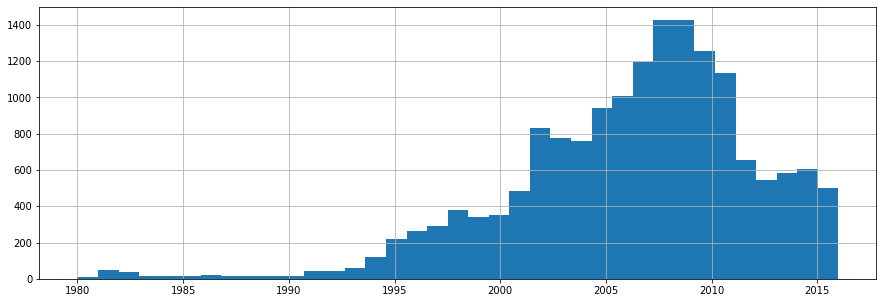

In [18]:
data[data['year_of_release'] != 0]['year_of_release'].hist(bins=37, figsize=(15,5))
plt.show()

Как видим, количество выпущенных игр растет и падает циклически в рамках общего тренда, а общий тренд таков, что с 1990 по 2008 годы наблюдался резкий рост, а далее после 2009 года - резкое падение вплоть до 2012 года, в 2013 года вновь начался рост, но уже далеко не такой массированный. Т.к. данные за 2016 год неполные, мы не можем утверждать, будут ли они выше, чем за 2015-й, но есть основания хотя бы не ожидать падения, т.к. настолько коротких циклов падения-роста-падения (4 года) ранее не наблюдалось.
Таким образом, можно считать, что текущий (для 2017 года) цикл падения-роста-падения начался в 2013 году. Данные раньше 2013 года скорее всего относятся к другому периоду, и использовать их напрямую для предсказаний на 2017 год скорее не нужно.

### Продажи игр по годам в разрезе платформ

Для начала выберем платформы с наибольшими суммарными продажами.

In [19]:
sales_pivot=data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
print(sales_pivot.sort_values(by='total_sales', ascending=False))

          total_sales
platform             
PS2           1255.77
X360           971.42
PS3            939.65
Wii            907.51
DS             806.12
PS             730.86
GBA            317.85
PS4            314.14
PSP            294.05
PC             259.52
3DS            259.00
XB             257.74
GB             255.46
NES            251.05
N64            218.68
SNES           200.04
GC             198.93
XOne           159.32
2600            96.98
WiiU            82.19
PSV             54.07
SAT             33.59
GEN             28.35
DC              15.95
SCD              1.86
NG               1.44
WS               1.42
TG16             0.16
3DO              0.10
GG               0.04
PCFX             0.03


Возьмем 10 платформ с наибольшими продажами и построим для них графики роста и падения объемов продаж игр. 

Для начала выделим продажи по всем годам, кроме нулевого, в разрезе платформ, в сводную таблицу.

In [20]:
data_year_pivot=data.query('year_of_release>0').pivot_table(index = 'year_of_release', columns='platform', values = 'total_sales', aggfunc = 'sum')
data_year_pivot.reset_index(inplace=True)
display(data_year_pivot)

platform,year_of_release,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1989,0.63,NaN,NaN,NaN,NaN,64.97,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Теперь построим на основе этой таблицы графики для платформ, которые мы выделили выше.

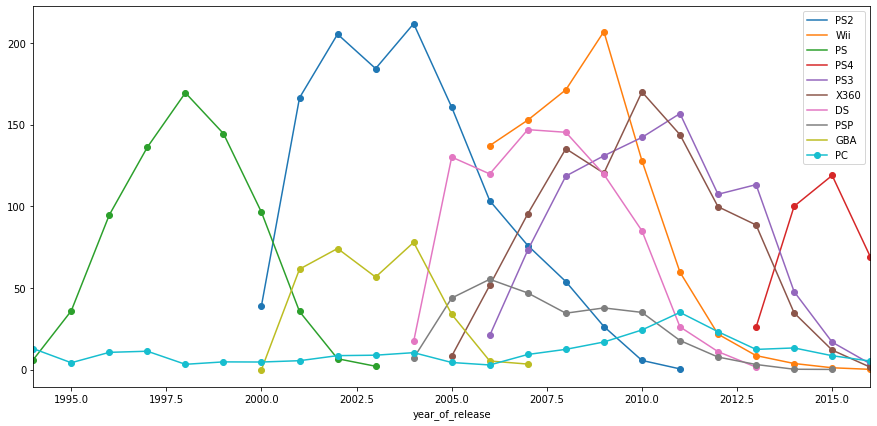

In [21]:
ax=data_year_pivot.plot(style='o-', x='year_of_release', y='PS2', xlim=(1994, 2016), grid=True, figsize=(15,7))
for platform in {'X360','PS3','Wii','DS','PS','GBA','PS4','PSP','PC'}:
    data_year_pivot.plot(ax=ax, style='o-', x='year_of_release', y=platform, xlim=(1994, 2016))


Как видим, если не считать ПК, который живет в своем режиме, жизненный цикл остальных платформ схож: в первый год продажи игр для них достаточно скромные, далее идет резкий рост, пик приходится на 4-6 годы жизни, далее идет спад, после 8-го-9-го года жизни продажи фактически сходят на нет, и платформа сменяется более новыми. То есть типичный жизненный цикл составляет около 9 лет.

Помимо этого, гистограммы подтверждают наш предыдущий вывод: с 2013 года начинается новый цикл, который характеризуется резким ростов продаж игр для PS4, продажи на остальных платформах, кроме ПК, постепенно уходят в ноль.

### Выделяем и исследуем актуальный период

Итак, выделим данные начиная с 2013 года в отдельный датафрейм и рассмотрим его характерные особенности.

In [22]:
data_current=data.query('year_of_release>=2013')
print(data_current.info())
display(data_current.head(20))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
name               2233 non-null object
platform           2233 non-null object
year_of_release    2233 non-null int64
genre              2233 non-null object
na_sales           2233 non-null float64
eu_sales           2233 non-null float64
jp_sales           2233 non-null float64
other_sales        2233 non-null float64
critic_score       991 non-null float64
user_score         1192 non-null float64
rating             1256 non-null object
total_sales        2233 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


Как видим, оценки пользователй и критиков, а также рейтинг, по-прежнему есть далеко не у всех игр. Это уже больше похоже на технические ошибки при сборе данных, у этих игр вся эта информация должна быть доступна. 

Теперь посмотрим на продажи в разрезе платформ.

In [23]:
sales_pivot_current=data_current.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
print(sales_pivot_current.sort_values(by='total_sales', ascending=False))

          total_sales
platform             
PS4            314.14
PS3            181.43
XOne           159.32
3DS            143.25
X360           136.80
WiiU            64.63
PC              39.43
PSV             32.99
Wii             13.66
PSP              3.50
DS               1.54


Как видим, хотя новые платформы в лидерах, старые еще не полностью сошли на нет: например, игр для PS3 было продано больше, чем для Xbox One. Построим графики, чтобы лучше понять динамику.

In [24]:
#Сначала сведем данные по продажам в таблицу по годам
current_data_year_pivot=data_current.pivot_table(index = 'year_of_release', columns='platform', values = 'total_sales', aggfunc = 'sum')
current_data_year_pivot.reset_index(inplace=True)
display(current_data_year_pivot)

platform,year_of_release,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
1,2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2,2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
3,2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


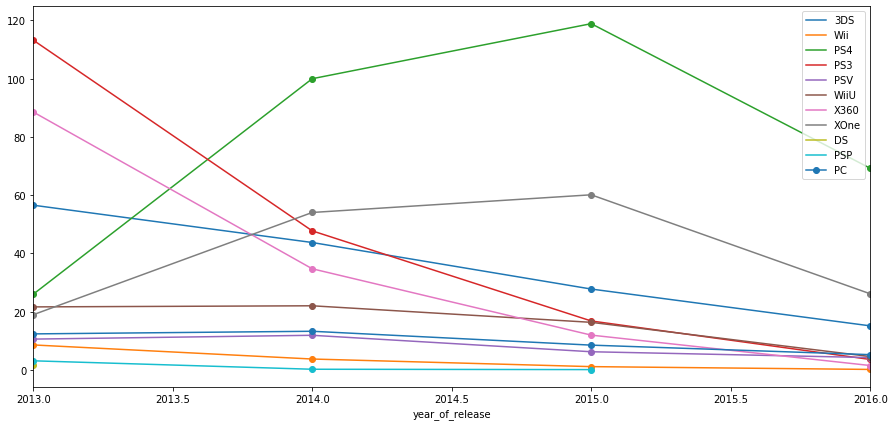

In [25]:
ax=current_data_year_pivot.plot(style='o-', x='year_of_release', y='3DS', grid=True, figsize=(15,7))
for platform in {'DS','PC','PS3','PS4','PSP','PSV','Wii','WiiU','X360','XOne'}:
    current_data_year_pivot.plot(ax=ax, style='o-', x='year_of_release', y=platform)


Не забывая, что данные за 2016 год являются неполными, имеем следующие тенденции: 
- продажи игр для PS3 и Xbox360 резко падают с изначальных больших значений
- продажи игр для PS4 и Xbox One растут быстрыми темпами
- продажи игр для 3DS тоже падают, но не так резко, и еще остаются актуальными
- продажи игр для PC стабильно низкие
- продажи игр для остальных платформ постепенно уходят в ноль

Таким образом, наибольший потенциал на 2017 год имеют PS4 и Xbox One, определенный потенциал все еще имеет 3DS, хотя рост от последней не ожидается.

Теперь построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам.

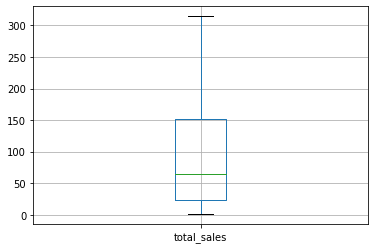

In [26]:
sales_pivot_current.boxplot(column='total_sales')
plt.show()

Как мы уже видели раньше, малое количество платформ приносит большую часть всех продаж. Медиана лежит немного выше 50 миллионов, а длинный верхний ус заканчивается выше 300 миллионов. Третий квартиль при этом находится на отметке 150 миллионов. Как видим, для магазина проще ограничить ассортимент несколькими наиболее популярными платфорами - они дают большую часть продаж.

<div class="alert alert-info">Теперь посмотрим на "ящики" для платформ из актуального периода.</div>

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


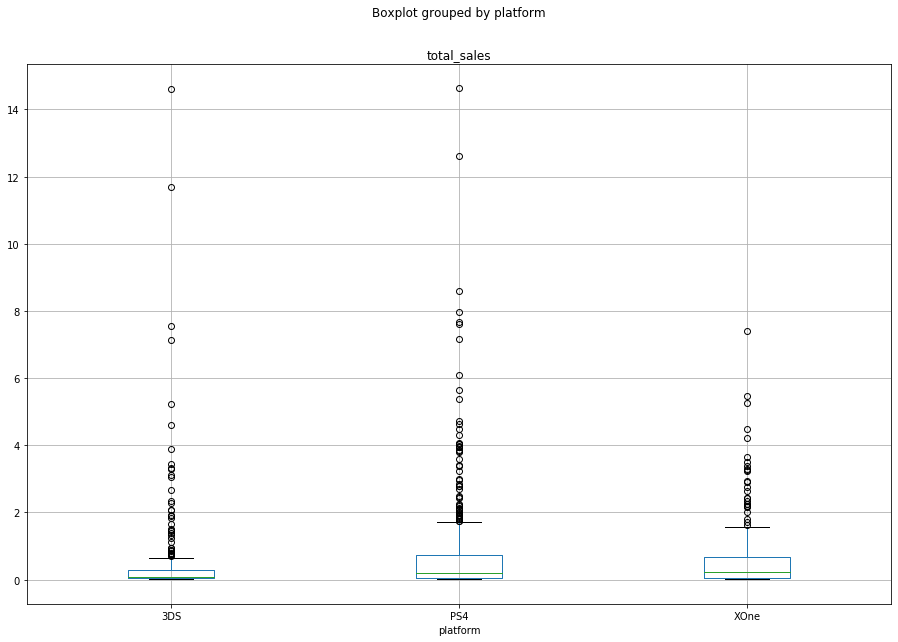

In [31]:
data_current.query('platform in ("3DS","PS4","XOne")').boxplot(column='total_sales', by='platform', figsize=(15,10))
plt.show()

Как видим, выбранные платформы, помимо нескольких игр с очень высокими продажами (появление которых мало предсказуемо), также имеют большое количество игр с продажами выше третьего квартиля. Среднее также смещено вверх по сравнению с медианой. Все это выгодно для магазина - он может продать много копий нескольких относительно популярных игр, а не раздувать ассортимент, продавая по несколько копий каждой игры. Значит с этой точки зрения эти платформы подходят для магазина.

### Исследуем корреляцию между продажами и оценками

Теперь изучим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Возьмем самую популярную в актуальном периоде платформу - PS4. Построим диаграммы рассеяния и посчитаем коэффициенты корреляции. NaN значения отбросим.

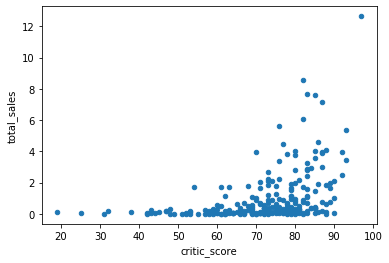

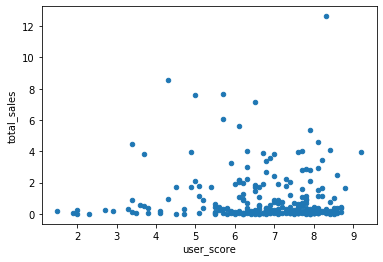

Коэффициент корреляции между общими продажами и отзывами критиков: 0.40589480145836687
Коэффициент корреляции между общими продажами и отзывами пользователей: -0.03362497596528878


In [32]:
#Выделяем множество игр на ПС4
data_current_ps4=data_current.query('platform=="PS4"').query('critic_score.notnull()').query('user_score.notnull()')
#Строим диаграммы рассеяния
data_current_ps4.plot(y='total_sales', x='critic_score', kind='scatter')
plt.show()
data_current_ps4.plot(y='total_sales', x='user_score', kind='scatter')
plt.show()
#Считаем корреляции
print('Коэффициент корреляции между общими продажами и отзывами критиков:',data_current_ps4['total_sales'].corr(data_current_ps4['critic_score']))
print('Коэффициент корреляции между общими продажами и отзывами пользователей:',data_current_ps4['total_sales'].corr(data_current_ps4['user_score']))

Что ж, результаты несколько неожиданны. Как мы видим из диаграммы рассеяния для оценок критиков, есть определенный массив игр с очень низкими оценками и очень низикими продажами. Также есть некоторое количество игр с высокими оценками и высокими продажами. Но основная масса игр имеет продажи до 2 миллионов копий и оценку больше 40, и в этом множестве зависимость становится гораздо менее четкой. Итоговый коэффициент корреляции - 0,4 - говорит о наличии прямой связи средней силы.

Что касается пользовательских оценок, здесь мы видим очень слабую обратную связь, но в целом правильнее будет сказать, что связи нет. Есть определенный массив игр с высокими продажами и низкими оценками, которые не позволяют сделать какие-то однозначные выводы.  

Можно ли сделать те же самые выводы для продаж на других платформах? Попробуем разобраться. Начнем с Xbox One.

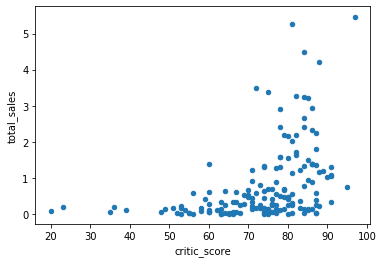

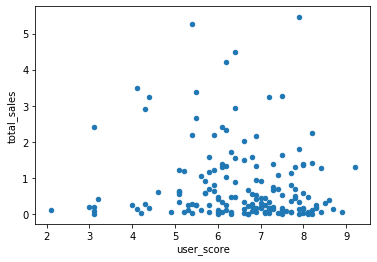

Коэффициент корреляции между общими продажами и отзывами критиков: 0.4104220356129637
Коэффициент корреляции между общими продажами и отзывами пользователей: -0.09400318326920852


In [33]:
#Выделяем множество игр на Xbox One
data_current_xone=data_current.query('platform=="XOne"').query('critic_score.notnull()').query('user_score.notnull()')
#Строим диаграммы рассеяния
data_current_xone.plot(y='total_sales', x='critic_score', kind='scatter')
plt.show()
data_current_xone.plot(y='total_sales', x='user_score', kind='scatter')
plt.show()
#Считаем корреляции
print('Коэффициент корреляции между общими продажами и отзывами критиков:',data_current_xone['total_sales'].corr(data_current_xone['critic_score']))
print('Коэффициент корреляции между общими продажами и отзывами пользователей:',data_current_xone['total_sales'].corr(data_current_xone['user_score']))

Корреляция с отзывами критиков еще больше, а с отзывами пользователей - еще меньше.

Теперь исследуем 3DS.

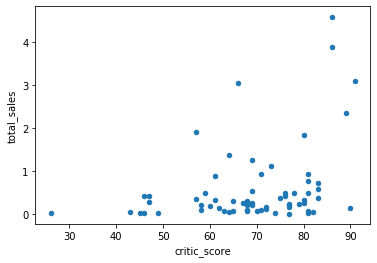

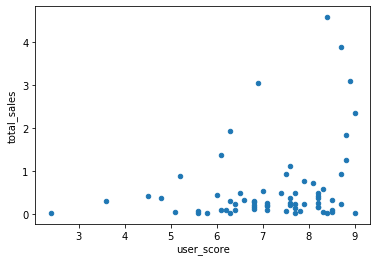

Коэффициент корреляции между общими продажами и отзывами критиков: 0.33923492878531464
Коэффициент корреляции между общими продажами и отзывами пользователей: 0.2729904366942444


In [34]:
#Выделяем множество игр на Xbox One
data_current_3DS=data_current.query('platform=="3DS"').query('critic_score.notnull()').query('user_score.notnull()')
#Строим диаграммы рассеяния
data_current_3DS.plot(y='total_sales', x='critic_score', kind='scatter')
plt.show()
data_current_3DS.plot(y='total_sales', x='user_score', kind='scatter')
plt.show()
#Считаем корреляции
print('Коэффициент корреляции между общими продажами и отзывами критиков:',data_current_3DS['total_sales'].corr(data_current_3DS['critic_score']))
print('Коэффициент корреляции между общими продажами и отзывами пользователей:',data_current_3DS['total_sales'].corr(data_current_3DS['user_score']))

А вот здесь ситуация уже совсем другая - корреляция между продажами и обзорами критиков слабее, а между продажами и пользовательскими обзорами - гораздо сильнее, чем раньше, и почти догоняет корреляцию с обзорами критиков. Это говорит нам о том, что корреляция для разных платформ может существенно отличаться и при появлении новых платформ этот вопрос потребует дополнительного изучения.

В заключение исследуем ситуацию для PS3, чтобы понять, ведет ли себя аудитория аналогично для платформ одной компании.

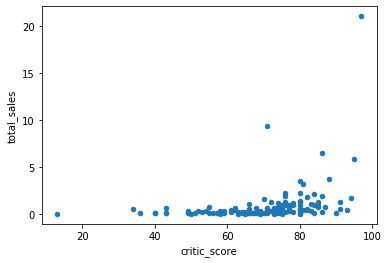

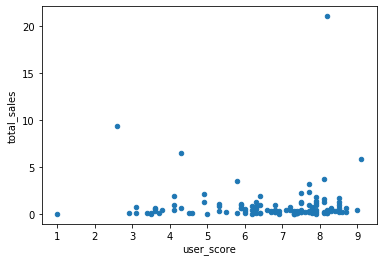

Коэффициент корреляции между общими продажами и отзывами критиков: 0.3338066356506173
Коэффициент корреляции между общими продажами и отзывами пользователей: 0.02269094327112414


In [35]:
#Выделяем множество игр на PS3
data_current_ps3=data_current.query('platform=="PS3"').query('critic_score.notnull()').query('user_score.notnull()')
#Строим диаграммы рассеяния
data_current_ps3.plot(y='total_sales', x='critic_score', kind='scatter')
plt.show()
data_current_ps3.plot(y='total_sales', x='user_score', kind='scatter')
plt.show()
#Считаем корреляции
print('Коэффициент корреляции между общими продажами и отзывами критиков:',data_current_ps3['total_sales'].corr(data_current_ps3['critic_score']))
print('Коэффициент корреляции между общими продажами и отзывами пользователей:',data_current_ps3['total_sales'].corr(data_current_ps3['user_score']))

Как видим, общие выводы схожи с PS4, но корреляция с отзывами критиков со временем стала больше, а с отзывами пользователй - наоборот меньше. 

### Исследуем продажи в разрезе жанров

Теперь посмотрим на продажи игр в разрезе жанров.

In [31]:
genre_pivot_current=data_current.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['sum','count'])
genre_pivot_current.columns=genre_pivot_current.columns.droplevel(1)
genre_pivot_current.reset_index(inplace=True)
genre_pivot_current['average']=genre_pivot_current['sum']/genre_pivot_current['count']
print(genre_pivot_current.sort_values(by='average',ascending=False))

           genre     sum  count   average
8        Shooter  232.98    187  1.245882
10        Sports  150.65    214  0.703972
4       Platform   42.63     74  0.576081
7   Role-Playing  145.89    292  0.499623
6         Racing   39.89     85  0.469294
2       Fighting   35.31     80  0.441375
0         Action  321.87    766  0.420196
3           Misc   62.82    155  0.405290
9     Simulation   21.76     62  0.350968
5         Puzzle    3.17     17  0.186471
11      Strategy   10.08     56  0.180000
1      Adventure   23.64    245  0.096490


Как видим, разница между разными жанрами более чем существенна. Самым популярным жанром по количеству выпущенных игр является Action (весьма расплывчатое понятие, в которое можно включить множество игр), но из-за большого количества игр в нем средние продажи каждой игры не очень велики. По средним продажам на одну игру выделяется жанр шутера - средние продажи одной игры почти в два раза больше, чем у идущих на втором месте по среднему количеству проданных копий спортивных игр. На последнем месте по средним продажам с отрывом в два раза от предпоследнего места - игры жанра adventure: их выходит много (по количеству выпущенных игр жанр на третьем месте), а общие продажи невелики. По общим продажам выделяется "большая четверка" жанров: action, шутеры, ролевые, спортивные. Далее следует провал. На самом последнем месте по общим продажам - головоломки.
В среднем продажи игр "спокойных жанров" (головоломки, стратегии, приключения) находятся на последних местах.

### Вывод

Мы исследовали, как менялось общее количество выпущенных игр по годам, а также посмотрели на типичных жизненный цикл игровой платформы. На основании этой информации мы выделили актуальный на 2017 год период - он начался в 2013 году - и далее работали с ним. Мы выделили самые перспективные платформы для этого периода - ими оказались PS4 и Xbox One с небольшим добавлением 3DS. Мы посмотрели, как распределяются по платформам глобальные продажи и увидели, что в течение одного периода наибольшую долю продаж приносят всего две-три платформы. Далее мы выяснили, как коррелируют продажи на разных платформах с оценками критиков и пользователей и выяснили, что тенденции могут разными, но в среднем имеется средняя положительная корреляция между продажами и оценками критиков. С оценками пользователей ситуация сложнее - для разных платформ она может быть как средне-положительной, так и околонулевой с тенденцией к отрицательной. После этого мы исследовали продажи игр разных жанров и выяснили, что самый прибыльный по соотношению количества выпущенных игр и их продаж - жанр шутера, а наименее прибыльный - жанр приключенческих игр.

## Шаг 4. Составьте портрет пользователя каждого региона

### Портрет в разрезе платформ

Выделим самые популярные платформы у пользователей каждого из трех основных регионов. Начнем с Японии.

In [32]:
#Выделяем отдельную совокупность
sales_pivot_jp=data_current.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
#Добавляем столбец с долей от всех продаж
sales_jp_sum=data_current['jp_sales'].sum()
sales_pivot_jp['share']=(sales_pivot_jp['jp_sales']/sales_jp_sum)*100
#Выводим результат
print(sales_pivot_jp.sort_values(by='share', ascending=False).head())

          jp_sales      share
platform                     
3DS          67.81  48.167353
PS3          23.35  16.586163
PSV          18.59  13.205001
PS4          15.96  11.336838
WiiU         10.88   7.728371


Как видим, в Японии очень популярны портативные платформы: на первом месте по общим продажам с долей в 48% - 3DS, на третьем - PS Vita. ПС3 на втором месте, ПС4 набирает популярность достаточно медленно и находится на четвертом месте. Неяпонские платформы в топе отсутствуют, что ожидаемо.

Перейдем к Северной Америке.

In [33]:
#Выделяем отдельную совокупность
sales_pivot_na=data_current.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
#Добавляем столбец с долей от всех продаж
sales_na_sum=data_current['na_sales'].sum()
sales_pivot_na['share']=(sales_pivot_na['na_sales']/sales_na_sum)*100
#Выводим результат
print(sales_pivot_na.sort_values(by='share', ascending=False).head())

          na_sales      share
platform                     
PS4         108.74  24.842933
XOne         93.12  21.274360
X360         81.66  18.656188
PS3          63.50  14.507322
3DS          38.20   8.727239


Здесь картина ожидаемо уже совсем другая. ПС4 набрала популярность гораздо быстрее и уже находится на первом месте, в топе две американские платформы - Xbox One и Xbox360 на втором и третьем местах. 3DS, которая в Японии была на первом месте, замыкает топ-5.

Теперь посмотрим на Европу. Можно предположить, что показатели будут похожи на США.

In [34]:
#Выделяем отдельную совокупность
sales_pivot_eu=data_current.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
#Добавляем столбец с долей от всех продаж
sales_eu_sum=data_current['eu_sales'].sum()
sales_pivot_eu['share']=(sales_pivot_eu['eu_sales']/sales_eu_sum)*100
#Выводим результат
print(sales_pivot_eu.sort_values(by='share', ascending=False).head())

          eu_sales      share
platform                     
PS4         141.09  35.971241
PS3          67.81  17.288326
XOne         51.59  13.152997
X360         42.52  10.840578
3DS          30.96   7.893328


Так и есть. ПС3 переехала с четвертого места в Северной Америке на второе, обе Playstation популярнее обоих Xbox, но в целом картина сохраняется. 3DS все так же замыкает первую пятерку.Обращает на себя внимание, что PS4 тоже более популярна относительно Северной Америки - если там на нее приходилось почти 25 процентов продаж игр, то в Европе - почти 36%.

### Портрет в разрезе жанров

Теперь выделим самые популярные в каждом из регионов жанры. Начнем опять же с Японии.

In [35]:
#Выделяем отдельную совокупность
sales_pivot_jp_genre=data_current.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
#Добавляем столбец с долей от всех продаж
sales_jp_sum=data_current['jp_sales'].sum()
sales_pivot_jp_genre['share']=(sales_pivot_jp_genre['jp_sales']/sales_jp_sum)*100
#Выводим результат
print(sales_pivot_jp_genre.sort_values(by='share', ascending=False).head())

              jp_sales      share
genre                            
Role-Playing     51.04  36.255150
Action           40.49  28.761188
Misc              9.20   6.535019
Fighting          7.65   5.434011
Shooter           6.61   4.695269


Более 36 процентов продаж приходится на ролевые игры, далее идут экшены, после них - загадочная категория "прочие". Далее - файтинги, а шутеры, о прибыльности которых в целом по миру мы писали выше, замыкают первую пятерку. Скорее всего, в других регионах самые популярные женры будут совсем другими - ближе к общемировым тенденциям, которые мы отметили на предыдщем шаге.

Посмотрим на Северную Америку.

In [36]:
#Выделяем отдельную совокупность
sales_pivot_na_genre=data_current.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
#Добавляем столбец с долей от всех продаж
sales_na_sum=data_current['na_sales'].sum()
sales_pivot_na_genre['share']=(sales_pivot_na_genre['na_sales']/sales_na_sum)*100
#Выводим результат
print(sales_pivot_na_genre.sort_values(by='share', ascending=False).head())

              na_sales      share
genre                            
Action          126.05  28.797606
Shooter         109.74  25.071394
Sports           65.27  14.911700
Role-Playing     46.40  10.600626
Misc             27.49   6.280414


Здесь экшены уже на первом месте с долей в 28%, а шутеры поднимаются на второе. В рейтинге появляются спортивные игры, а ролевые опускаются на четвертое место. Файтинги исчезают, "прочие" опускаются на пятое место.

Изучим топ жанров в Европе. Скорее всего, больших отличий от США не будет.

In [37]:
#Выделяем отдельную совокупность
sales_pivot_eu_genre=data_current.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
#Добавляем столбец с долей от всех продаж
sales_eu_sum=data_current['eu_sales'].sum()
sales_pivot_eu_genre['share']=(sales_pivot_eu_genre['eu_sales']/sales_eu_sum)*100
#Выводим результат
print(sales_pivot_eu_genre.sort_values(by='share', ascending=False).head())

              eu_sales      share
genre                            
Action          118.13  30.117533
Shooter          87.86  22.400122
Sports           60.52  15.429722
Role-Playing     36.97   9.425592
Racing           20.19   5.147490


И действительно - на пятом месте "прочие" сменяются гонками, а все остальные жанры остаются на тех же самых местах рейтинга и почти с теми же самыми долями.

В общем и целом можно сказать, что в Японии ситуация более специфическая - популярны жанры, в которых традиционно больше японских игр (или наоборот - японские разработчики выпускают игры, популярные у японских игроков). Это прежде всего ролевые игры, а также файтинги. Шутеры в основном выпускаются западными компаниями и в Японии существенно менее популярны, чем в среднем по миру. В Европе и США тенденции схожи, и в основном именно они формируют то, что понимается под "мировым рынком" - об этом говорит то, что распределение по жанрам для них похоже на общемировое, которое мы выделили на предыдущем шаге.

### Портрет в разрезе возрастных рейтингов

Исследуем, как распределяются доли продаж игр разных возрастных рейтингов. Начнем опять же с Японии.

In [38]:
#Выделяем отдельную совокупность
sales_pivot_jp_rating=data_current.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')
#Добавляем столбец с долей от продаж всех игр
sales_jp_sum_rating=data_current['jp_sales'].sum()
sales_pivot_jp_rating['share']=(sales_pivot_jp_rating['jp_sales']/sales_jp_sum_rating)*100
#Выводим результат
print(sales_pivot_jp_rating.sort_values(by='share', ascending=False).head())

        jp_sales      share
rating                     
T          20.59  14.625657
E          15.14  10.754369
M          14.11  10.022731
E10+        5.89   4.183833


Обращает на себя внимание, что сумма долей всех рейтингов - всего 38%. То есть 62% продаж приходятся на игры без рейтинга. Что это значит? Помимо возможности технических ошибок, есть еще одно объяснение - если игра не выходила в США, рейтинга ESRB у нее нет. Значит, большая часть продаж приходится на специфические игры для японского рынка, которые за его пределами не выходили. Это согласуется с выводами о специфичности японского рынка, которые мы сделали до этого.
<br/>

По самим рейтингам можно сказать, что самая популярная категория - это игры с рейтингом T(13+). Далее идут игры с рейтингом E (без возрастных ограничений). Незначительно остают игры с рейтингом M (17+). Замыкает топ рейтинг E10+.

<br/>Посмотрим, меняется ли ситуация в Северной Америке.

In [37]:
#Выделяем отдельную совокупность
sales_pivot_na_rating=data_current.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')
#Добавляем столбец с долей от продаж всех игр
sales_na_sum_rating=data_current['na_sales'].sum()
sales_pivot_na_rating['share']=(sales_pivot_na_rating['na_sales']/sales_na_sum_rating)*100
#Выводим результат
print(sales_pivot_na_rating.sort_values(by='share', ascending=False))

        na_sales      share
rating                     
M         165.21  37.744169
E          79.05  18.059903
E10+       54.24  12.391766
T          49.79  11.375111


Здесь ситуация уже совсем другая. Это неудивительно, если вспомнить про распределение жанров. Гораздо более популярные в Северной Америке шутеры как правило имеют рейтинг M, что и делает его наиболее популярным с долей более 47 процентов. Рейтинг T же, к которому часто относятся японские ролевые игры, опускается на последнее место по популярности. 

Теория про специфические японские игры тоже находит определенное подтверждение - в Северной Америке доля игр, для которых не указан рейтинг, гораздо меньше - около 22%

Посмотрим, изменится ли ситуация в Европе.

In [39]:
#Выделяем отдельную совокупность
sales_pivot_eu_rating=data_current.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')
#Добавляем столбец с долей от продаж всех игр, для которых у нас есть рейтинг
sales_eu_sum_rating=data_current['eu_sales'].sum()
sales_pivot_eu_rating['share']=(sales_pivot_eu_rating['eu_sales']/sales_eu_sum_rating)*100
#Выводим результат
print(sales_pivot_eu_rating.sort_values(by='share', ascending=False))

        eu_sales      share
rating                     
M         145.32  37.049690
E          83.36  21.252836
E10+       42.69  10.883920
T          41.95  10.695255


Ситуация, как и ожидалось, почти аналогична ситуации в Северной Америке - гоночные игры, которые обычно не имеют возрастных ограничений, увеличивают долю игр с рейтингом E, в остальном различий нет.

<br/>Теория про специфические японские игры снова подтверждается - в Европе процент продаж игр без рейтинга такой же, как в Северной Америке.

### Вывод

Составив типичные портреты пользователей каждого региона, мы увидели, что есть существенные отличия для Японии, тогда как Северная Америка и Европа имеют отличия друг от друга, но в целом похожи. 

Что касается платформ, в Японии популярны портативные платформы (3DS и Vita) и медленнее идет внедрение новых платформ - ПС4 менее популярна, чем ПС3. Также определенную популярность имела Wii U. Американские платформы - Xbox One и Xbox360 - в Японии совсем не популярны. В Северной Америке и Европе портативные платформы менее популярны (3DS на последнем месте среди наиболее популярных), а американские платформы - существенно более. В Северной Америке они ожидаемо популярны больше, чем в Европе - в последней PS3 обгоняет Xbox One. На первом месте и там и там PS4 - внедрение новых платформ происходит быстрее, чем в Японии.

Что касается жанров, в Японии также есть существенная специфика - популярны жанры, где выходит большое количество японских игр: ролевые игры популярнее всего, также достаточно серьезное место занимают файтинги. Шутеры гораздо менее популярны, чем в среднем в мире. В Европе и США ситуация совсем другая и почти идентичная - на первом месте экшены, далее идут шутеры, спортивные игры (их в Японии вообще нет в топе), далее ролевые. На последнем месте среди наиболее популярных жданров в Европе гонки, в Северной Америке - загадочные "прочие".

Ситуация с возрастными рейтингами вытекает из жанров - в Японии ролевые игры тянут средний рейтинг "вниз" (они обычно имеют рейтинг T), в Северной Америке и Европе шутеры тянут "вверх", к 17+. В Европе дополнительно выделяются гонки, которые не имют возрастных ограничений и увеличивают удельный вес рейтинга E.

## Шаг 5. Проверьте гипотезы

### Гипотеза о пользовательских рейтингах для платформ Xbox One и PC

Начнем с проверки гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Нулевую гипотезу сформулируем так: средний пользовательский рейтинг игр для платформы Xbox One равен среднему пользовательскому рейтингу игр для платформы PC. Альтернативную гипотезу сформулируем так: средний пользовательский рейтинг игр для платформы Xbox One не равен среднему пользовательскому рейтингу игр для платформы PC.

Для начала выясним, можем ли мы считать одинаковой дисперсию двух выборок - игр для Xbox One и игр для PC. 

In [41]:
#Выделим совокупности
user_score_XOne=data_current.query('platform=="XOne"').query('user_score.notnull()')['user_score']
user_score_PC=data_current.query('platform=="PC"').query('user_score.notnull()')['user_score']
print('Дисперсия пользовательского рейтинга для платформы Xbox One:',np.var(user_score_XOne, ddof=1))
print('Дисперсия пользовательского рейтинга для платформы PC:',np.var(user_score_PC, ddof=1))

Дисперсия пользовательского рейтинга для платформы Xbox One: 1.9069968429360695
Дисперсия пользовательского рейтинга для платформы PC: 3.035892752408882


Как видим, дисперсии отличаются более чем в полтора раза, так что считать их равными оснований нет. Исходя из этого, проверим нашу гипотезу.

In [42]:
#Зададим критический уровень статистической значимости
alpha=0.05
#Проводим сравнение
results = st.ttest_ind(user_score_XOne, user_score_PC, equal_var=False)
#Выводим результаты
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Как видим, имеющиеся данные не дают нам возможность отвергнуть нулевую гипотезу: с вероятностью почти в 15% такие результаты могут быть получены случайно. Следовательно, мы не можем с уверенностью считать, что средние пользовательские рейтинги платформ Xbox One и PC не равны.

### Гипотеза о пользовательских рейтингах жанров Action и Sports

Перейдем ко второй гипотезе - о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Нулевую гипотезу сформулируем так: средний пользовательский рейтинг игр жанра Action равен среднему пользовательскому рейтингу игр жанра Sports. Альтернативную гипотезу сформулируем так: средний пользовательский рейтинг игр жанра Action не равен среднему пользовательскому рейтингу игр жанра Sports.

Но сначала, как и в прошлый раз, проверим, можем ли мы считать равными дисперсии выборок.

In [43]:
#Выделим совокупности
user_score_Action=data_current.query('genre=="Action"').query('user_score.notnull()')['user_score']
user_score_Sports=data_current.query('genre=="Sports"').query('user_score.notnull()')['user_score']
print('Дисперсия пользовательского рейтинга для игр жанра Action:',np.var(user_score_Action, ddof=1))
print('Дисперсия пользовательского рейтинга для игр жанра Sports:',np.var(user_score_Sports, ddof=1))

Дисперсия пользовательского рейтинга для игр жанра Action: 1.7693609042482705
Дисперсия пользовательского рейтинга для игр жанра Sports: 3.180612814465409


Дисперсии отличаются почти в два раза. Этого более чем достаточно, чтобы считать их неодинаковыми. Отталкиваясь от этого, приступим к проверке гипотезы.

In [44]:
#Зададим критический уровень статистической значимости
alpha=0.05
#Проводим сравнение
results = st.ttest_ind(user_score_Action, user_score_Sports, equal_var=False)
#Выводим результаты
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Как видим, мы можем отвергнуть нулевую гипотезу. Это значит, что имеющиеся у нас данные позволяют предположить, что средние пользовательские рейтинги жанров Action и Sports разные.

### Вывод

Мы проверили две гипотезы - "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "Средние пользовательские рейтинги жанров Action и Sports разные". Обе гипотезы на наших данных опровергнуты не были.

## Шаг 6. Напишите общий вывод

В ходе проведенного исследования были обработаны данные о продажах видеоигр. 

Мы изучили данные, привели их к нужным типам, удалили два мусорных значения, зафиксировали пропуски в столбцах оценки критиков, пользовательской оценки, рейтинга. Для старых игр эти пропуски вызваны тем, что они были выпущены до того, как эти оценки и рейтинги были введены в оборот. Но многие пропуски для более новых игр нельзя объяснить иначе как техническими ошибками при загрузке данных. Также были выявлены пропуски в столбце года выпуска игры, их мы заменили нулями в качестве маркеров. Кроме того, были выявлены записи "tbd" в столбце пользовательского рейтинга - они свидетельствуют о недостатке количества пользовательских оценок для агрегирования. Мы заменили эти записи на NaN, чтобы привести столбец к типу float и иметь возможность проводить со значениями в нем математические операции.

Мы исследовали, как менялось общее количество выпущенных игр по годам, а также посмотрели на типичных жизненный цикл игровой платформы. На основании этой информации мы выделили <b>актуальный на 2017 год период - он начался в 2013 году</b> - и далее работали с ним. Мы выделили самые перспективные платформы для этого периода - ими оказались <b>PS4 и Xbox One с небольшим добавлением 3DS</b>. Мы посмотрели, как распределяются по платформам глобальные продажи и увидели, что <b>в течение одного периода наибольшую долю продаж приносят всего две-три платформы, а внутри них - относительно небольшое количество наиболее популярных игр</b>. Далее мы выяснили, как коррелируют продажи на разных платформах с оценками критиков и пользователей и выяснили, что тенденции могут разными, но в среднем <b>имеется средняя положительная корреляция между продажами и оценками критиков</b>, а для оценок пользователей ситуация разная для разных платформ - связь может быть как средне-положительной, так и околонулевой с тенденцией к отрицательной. При этом тенденции для более новой платформы компании обычно повторяют тенденции для более старой платформы той же компании. После этого мы исследовали продажи игр разных жанров и выяснили, что <b>самый прибыльный по соотношению количества выпущенных игр и их продаж - жанр шутера, а наименее прибыльный - жанр приключенческих игр</b>. 

Далее мы составили типичные портреты пользователей из трех основных регионов (Япония, Северная Америка, Европа) и выяснили, что <b>портреты для пользователей из Северной Америки и Европы схожи, а вот японский - кардинально отличается</b>. Так, в Японии популярны портативные платформы и медленнее идет внедрение новых платформ. Американские платформы не популярны совсем. В Северной Америке и Европе портативные платформы менее популярны, а американские платформы - существенно более популярны, чем в Японии, и чем портативные. В Северной Америке американские платформы популярнее, чем в Европе. На первом месте и там и там PS4. Что касается жанров, в Японии популярны специфические жанры японских ролевых игр и файтингов. Шутеры гораздо менее популярны, чем в среднем в мире. В Европе и США популярнее всего экшены, далее идут шутеры, спортивные игры (их в Японии вообще нет в топе), далее ролевые. В Европе популярны гонки, чего в других регионах нет. Ситуация с возрастными рейтингами вытекает из жанровой - в Японии больше доля более низкого возрастного рейтинга T (13+), в США и Европе - более высокого M (17+).

Наконец, мы проверили две гипотезы: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "Средние пользовательские рейтинги жанров Action и Sports разные". Предварительно была проведена проверка равенства дисперсий выборок, средние значения по которым мы сравнивали. В итоге <b>обе гипотезы не были опровергнуты на тех данных, которые имелись в нашем распоряжении</b>.